In [2]:
from google.colab import files
uploaded = files.upload()

Saving Tweets.csv to Tweets.csv


In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re
import io
from wordcloud import WordCloud
from textblob import TextBlob
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [4]:
df = pd.read_csv(io.BytesIO(uploaded['Tweets.csv']))

In [5]:
# Load dataset
df = df[['airline_sentiment', 'text', 'airline', 'tweet_created']]
df.columns = ['Sentiment', 'Tweet', 'Airline', 'Timestamp']



In [6]:
# Clean tweets
stop_words = set(stopwords.words('english'))
def clean_text(text):
    text = re.sub(r"http\S+|@\S+|#\S+|[^A-Za-z\s]", "", text)
    text = text.lower()
    words = text.split()
    return " ".join([w for w in words if w not in stop_words])

df['Clean_Tweet'] = df['Tweet'].apply(clean_text)

In [7]:
# Predict sentiment using TextBlob
def get_sentiment(text):
    polarity = TextBlob(text).sentiment.polarity
    if polarity > 0:
        return 'Positive'
    elif polarity < 0:
        return 'Negative'
    else:
        return 'Neutral'

df['Predicted_Sentiment'] = df['Clean_Tweet'].apply(get_sentiment)

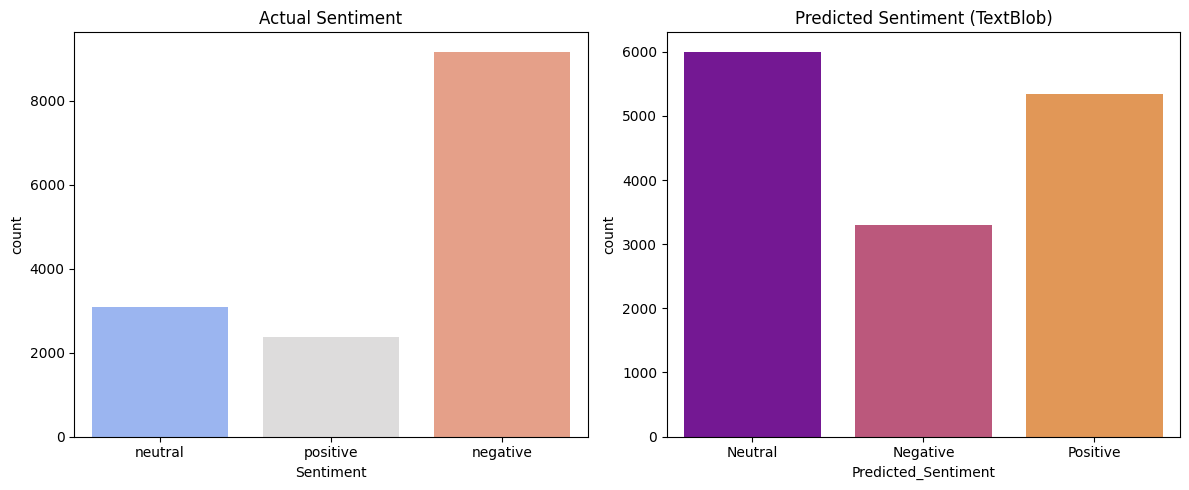

In [8]:
# --- VISUAL 1: Actual vs Predicted Sentiment Bar Chart
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
sns.countplot(x='Sentiment', hue='Sentiment', data=df, palette='coolwarm', legend=False)
plt.title('Actual Sentiment')

plt.subplot(1, 2, 2)
sns.countplot(x='Predicted_Sentiment', hue='Predicted_Sentiment', data=df, palette='plasma', legend=False)
plt.title('Predicted Sentiment (TextBlob)')

plt.tight_layout()
plt.show()

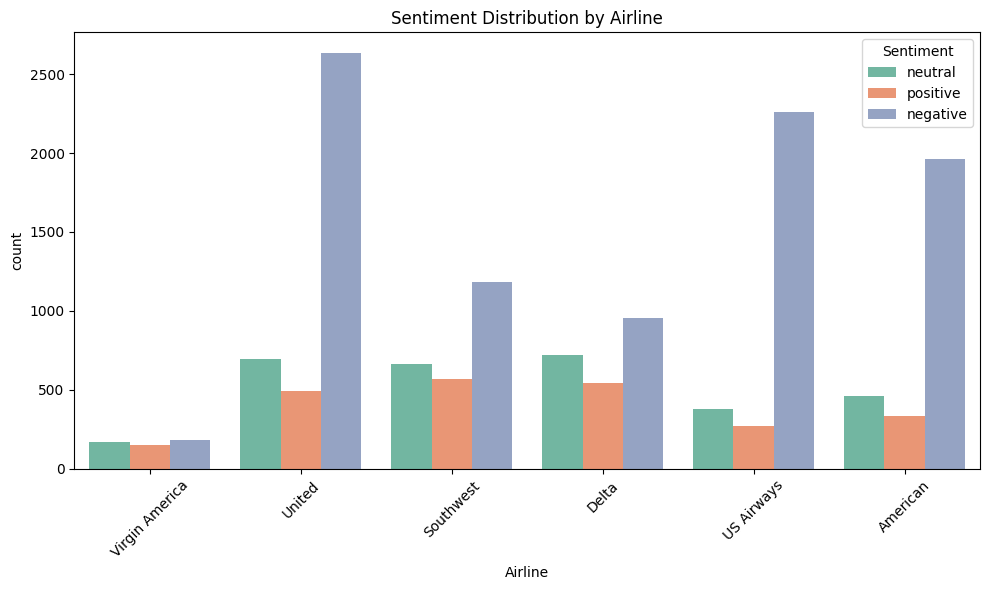

In [9]:
# --- VISUAL 2: Sentiment Distribution by Airline
plt.figure(figsize=(10, 6))
sns.countplot(x='Airline', hue='Sentiment', data=df, palette='Set2')
plt.title('Sentiment Distribution by Airline')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


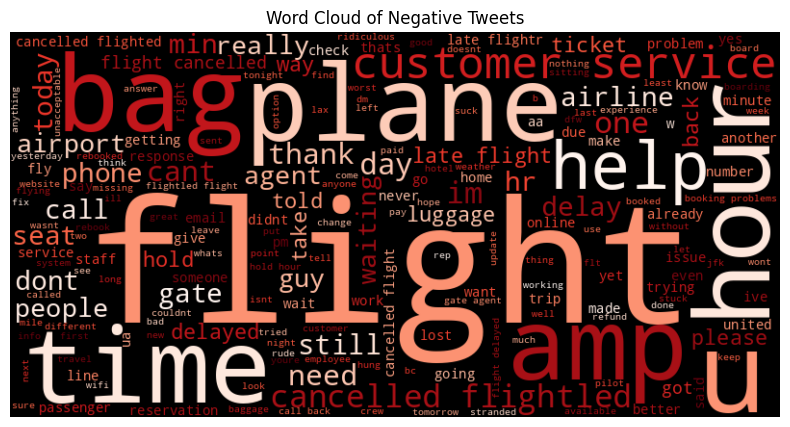

In [10]:
# --- VISUAL 3: Word Cloud for Negative Tweets
negative_text = " ".join(df[df['Sentiment'] == 'negative']['Clean_Tweet'])
wordcloud = WordCloud(width=800, height=400, background_color='black', colormap='Reds').generate(negative_text)
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("Word Cloud of Negative Tweets")
plt.show()

<Figure size 1200x600 with 0 Axes>

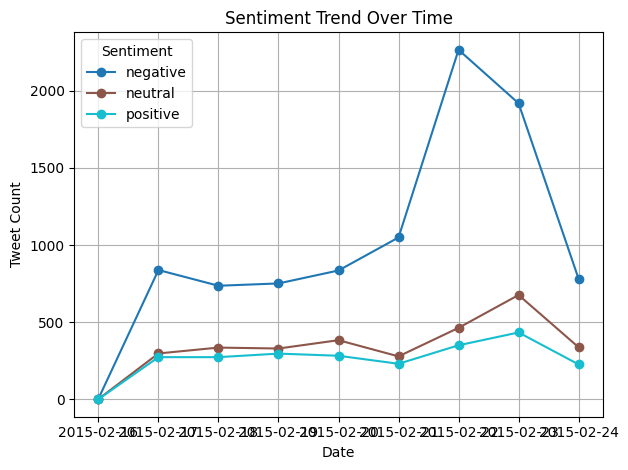

In [11]:
# --- VISUAL 4: Sentiment Trend Over Time (if timestamp useful)
df['Date'] = pd.to_datetime(df['Timestamp']).dt.date
sentiment_trend = df.groupby(['Date', 'Sentiment']).size().unstack().fillna(0)

plt.figure(figsize=(12, 6))
sentiment_trend.plot(kind='line', marker='o', colormap='tab10')
plt.title('Sentiment Trend Over Time')
plt.xlabel('Date')
plt.ylabel('Tweet Count')
plt.grid(True)
plt.tight_layout()
plt.show()